# Test and Debug notebook for visualize module

In [1]:
import os
import sys

import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime

cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.request import hydrophone_request
from ooipy.tools import ooiplotlib as ooiplt
from matplotlib import pyplot as plt


# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = 'PC01A'


print('Getting Hydrophone Data from OOI: \n')
hydrophone_data = hydrophone_request.get_acoustic_data(start_time, end_time, node, verbose=True)

Getting Hydrophone Data from OOI: 

Fetching URLs...
Sorting valid URLs for Time Window...


In [4]:
# compute spectrogram and PSD
hydrophone_data.compute_spectrogram_mp(n_process=3, avg_time=1.0,)
hydrophone_data.compute_psd_welch()

In [5]:
type(hydrophone_data.spectrogram.time[0])

datetime.datetime

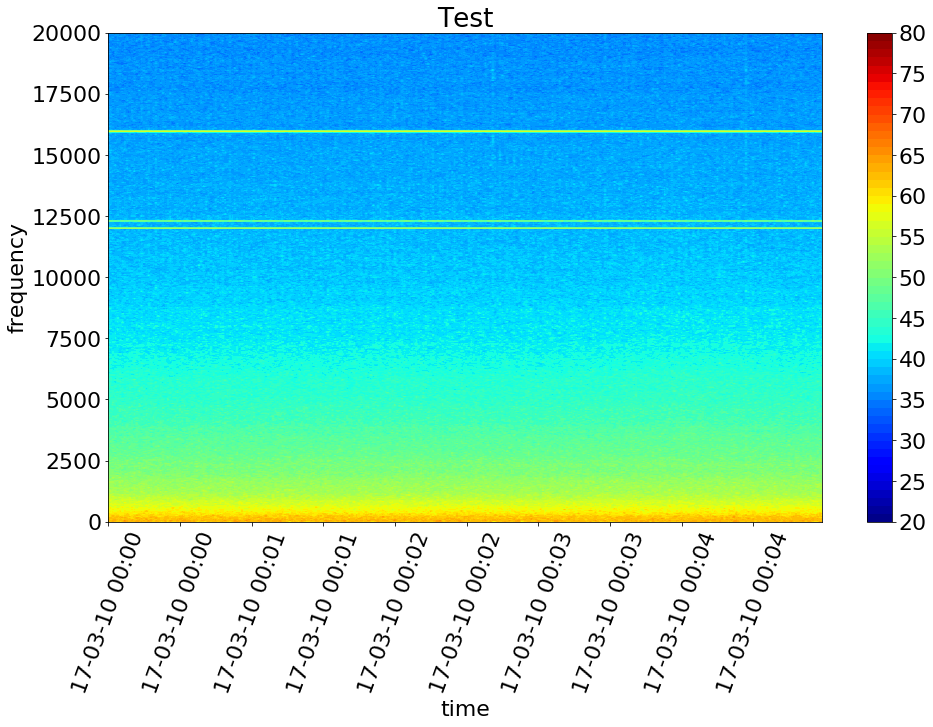

In [6]:
ooiplt.plot(hydrophone_data.spectrogram)
plt.title('Test')
plt.ylim([0, 20000])
plt.show()

C:\Users\fschwock\Documents\Research\Studium_Master\Research\programming\ooi_lib\ooipy\ooipy\tools\ooiplotlib.py:138: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


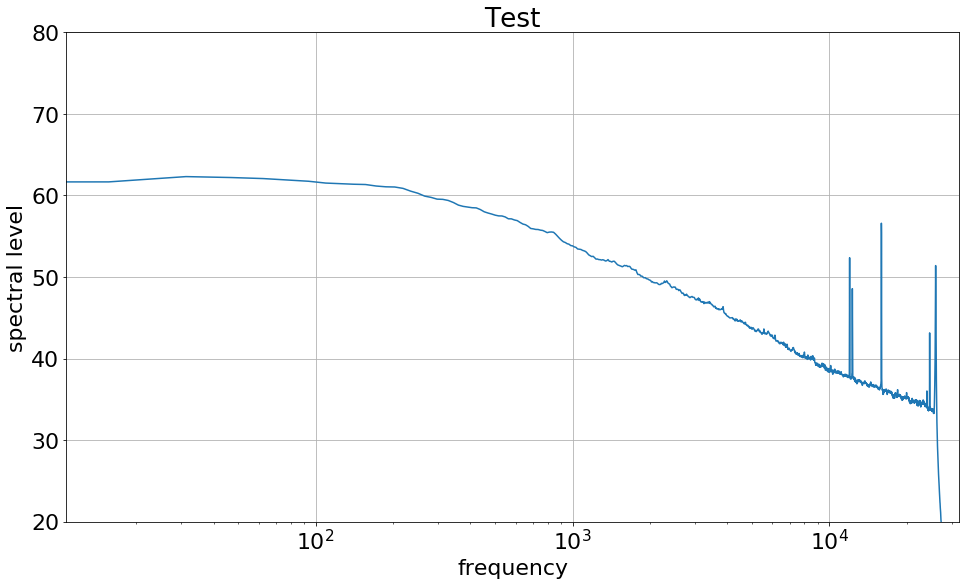

In [7]:
ooiplt.plot(hydrophone_data.psd)
plt.title('Test')
plt.show()

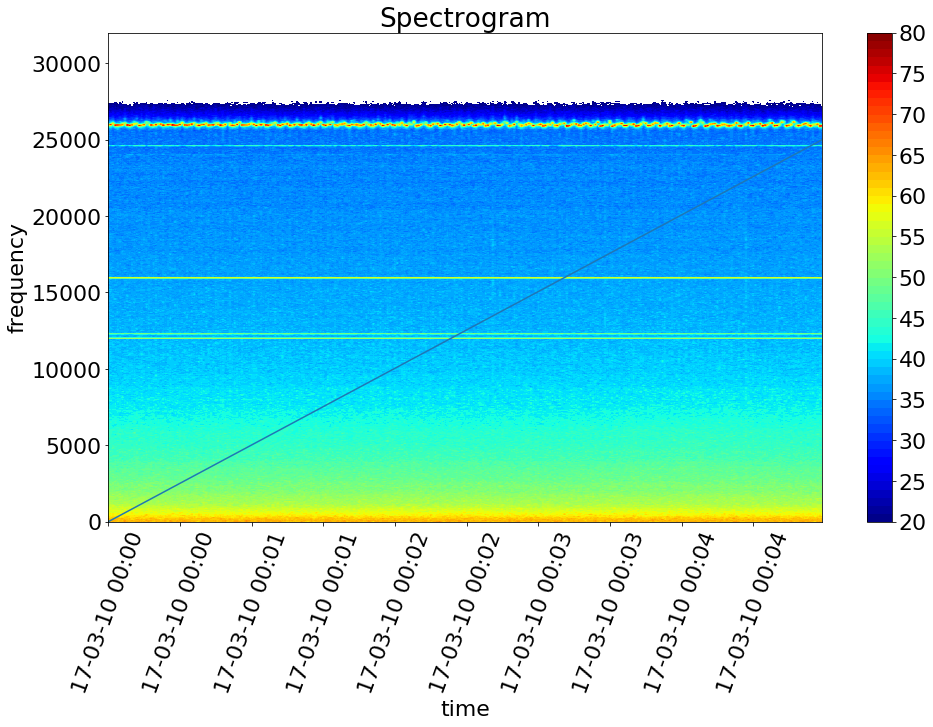

C:\Users\fschwock\Documents\Research\Studium_Master\Research\programming\ooi_lib\ooipy\ooipy\tools\ooiplotlib.py:138: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


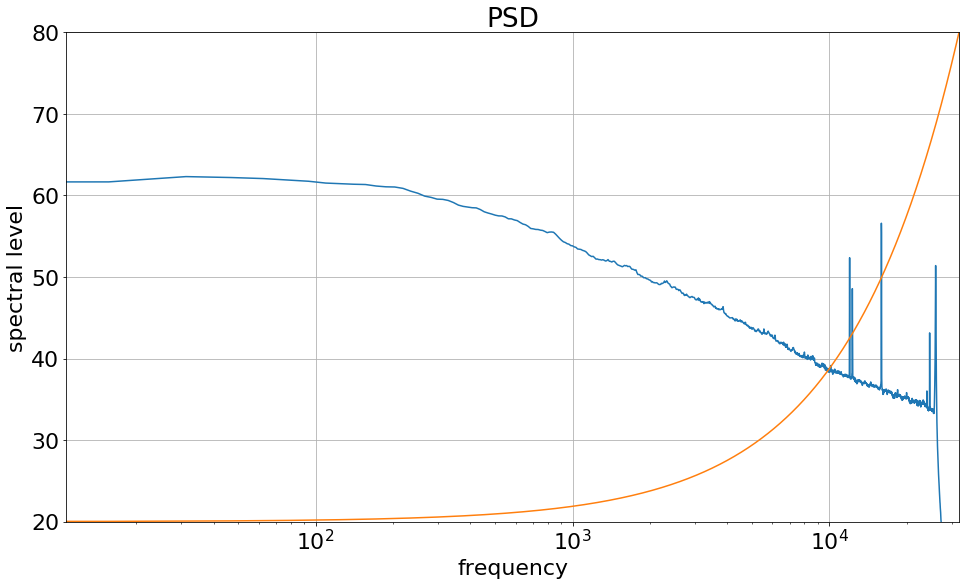

In [8]:
# plot additional figures on top of other plots
N = len(hydrophone_data.spectrogram.time)
K = len(hydrophone_data.psd.freq)
ooiplt.plot(hydrophone_data.spectrogram)
plt.plot(hydrophone_data.spectrogram.time, np.linspace(1, 25000, N))
plt.show()

ooiplt.plot(hydrophone_data.psd)
plt.plot(hydrophone_data.psd.freq, np.linspace(20, 80, K))
plt.show()

In [11]:
# Test saving spectrogram and PSD
from ooipy.tools import workflow as wf

wf.save(hydrophone_data.spectrogram, 'test_spec.pickle', rain_rate = [1,2,3])
wf.save(hydrophone_data.psd, 'test_psd.json', rr = 2.4, ws = 10.4)


In [12]:
import pickle
infile = open('test_spec.pickle', 'rb')
spec_dct = pickle.load(infile, encoding='bytes')
spec_dct['rain_rate']

[1, 2, 3]